## make the Terrain Data
###  1. create random value and calc the label
###  2. split to train & test data 


In [36]:
import random
def makeTerrainData(n_points=1000):
#make the toy dataset
    random.seed(50)
    grade=[random.random() for ii in range(0,n_points)]
    bumpy=[random.random() for ii in range(0,n_points)]    
    error=[random.random() for ii in range(0,n_points)]    
    y=[round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0,len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii]=1.0

#split into train/test sets
    X=[[gg,ss] for gg,ss in zip(grade,bumpy)]
    split=int(0.75*n_points)
    X_train=X[0:split]
    X_test=X[split:]
    y_train=y[0:split]
    y_test=y[split:]
    
    return X_train,y_train,X_test,y_test

makeTerrainData(20)

([[0.4975365687586023, 0.9153921598736201],
  [0.2661737230725406, 0.9624532167911902],
  [0.6374111614436909, 0.6931477606588518],
  [0.24247975418376266, 0.8249037141670215],
  [0.4731685799874552, 0.7938285744978436],
  [0.9703361491117534, 0.6431235882103946],
  [0.08518806501099674, 0.43029214446042363],
  [0.31737891751820513, 0.2272211040366383],
  [0.6764439534894834, 0.26618017106327707],
  [0.0852413172296076, 0.9300172137798001],
  [0.15331752856953773, 0.7000659032477788],
  [0.8252738498040315, 0.10579514653289779],
  [0.9797228526139108, 0.9108122843705956],
  [0.3193386437176482, 0.2710858352944323],
  [0.18896898678495433, 0.6924618004350633]],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [[0.9723752503414661, 0.4599922159807449],
  [0.3289191945502741, 0.26966362910775055],
  [0.6037845231084645, 0.2092539856889395],
  [0.6074942084317443, 0.5790755087347463],
  [0.6349887556504961, 0.41176567735033565]],
 [1.0, 0.0, 0.0, 1.0, 1.0])

### 1. import the sklearn module for GaussianNB
### 2. create classifier
### 3. fit the classifier on the training features and labels
### 4. return the fit classifier

In [37]:
from sklearn.naive_bayes import GaussianNB
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    
    
    ### your code goes here!

    clf=GaussianNB()
    clf.fit(features_train,labels_train)
    return clf

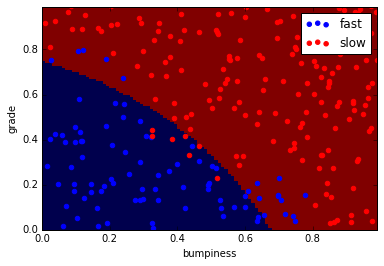

In [82]:
#!/usr/bin/python

""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """


# from prep_terrain_data import makeTerrainData
# from class_vis import prettyPicture, output_image
# from ClassifyNB import classify
%matplotlib inline
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)


###先用meshgrid将所有的坐标点画出来，然后再将颜色涂色
### draw the decision boundary with the text points overlaid 
# prettyPicture(clf, features_test, labels_test)
# output_image("test.png", "png", open("test.png", "rb").read())


import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x_min=0.0;x_max=1.0;
y_min=0.0;y_max=1.0;
h=.01
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)
# plt.show()
# Plot also the test points
X_test=features_test
y_test=labels_test
grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")

plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()